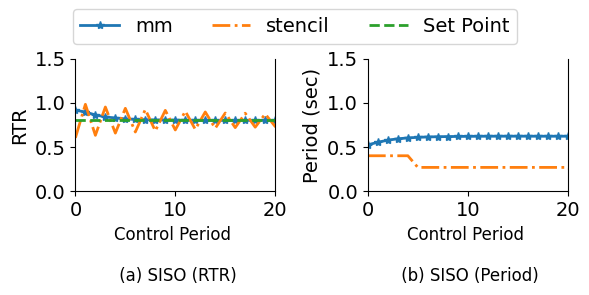

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Helper function to read data from a text file and convert to a list of floats
def read_data(file_path):
    with open(file_path, 'r') as f:
        return [float(line.strip()) for line in f.readlines()]

# -------------------- Read Data --------------------
# Open-loop RTR data
open_s1 = read_data('logs/s1a.txt')
open_s2 = read_data('logs/s2a.txt')
setpoint1_open = [0.80] * len(open_s1)

# Open-loop Period data
open_p1 = read_data('logs/p1a.txt')
open_p2 = read_data('logs/p2a.txt')



idx_rtr = slice(5, -1)

#fig, axs = plt.subplots(1, 4, figsize=(12, 3), sharex=False)
fig, axs = plt.subplots(1, 2, figsize=(6, 3), sharex=False)

# Subplot 0: Open-Loop RTR
axs[0].plot(open_s1[idx_rtr], '-*', linewidth=2, label='mm')
axs[0].plot(open_s2[idx_rtr], '-.', linewidth=2, label='stencil')
axs[0].plot(np.array(setpoint1_open)[idx_rtr], '--', linewidth=2, label='Set Point')
axs[0].set_ylabel('RTR', fontsize=14)
axs[0].set_xlabel('Control Period \n \n (a) SISO (RTR)', fontsize=12)
axs[0].set_ylim([0, 1.5])
axs[0].set_xlim([0, 20])
axs[0].spines['top'].set_visible(False)

# Subplot 1: Open-Loop Period
axs[1].plot(open_p1[idx_rtr], '-*', linewidth=2, label='mm')
axs[1].plot(open_p2[idx_rtr], '-.', linewidth=2, label='stencil')
axs[1].set_ylabel('Period (sec)', fontsize=14)
#axs[1].set_xlabel('Control Period \n \n (d) RTR step size 0.095', fontsize=12)
axs[1].set_xlabel('Control Period \n \n (b) SISO (Period)', fontsize=12)
axs[1].set_ylim([0, 1.5])
axs[1].set_xlim([0, 20])
axs[1].spines['top'].set_visible(False)


# Set tick label sizes for all subplots
for ax in axs:
    ax.tick_params(axis='both', labelsize=14)

# Create one common legend (using handles from the Open-Loop RTR subplot)
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, frameon=True, fontsize=14)

# Adjust layout to leave space at the top for the legend
plt.tight_layout(rect=[0, 0, 1, 0.88])
fig.savefig('figures/SISO.pdf', bbox_inches='tight', dpi=300, format='pdf')
